<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/Langlands_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Using device: cuda


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Initializing Enhanced Quantum Langlands Analyzer...
Generating Langlands fractal visualization with 200 points...


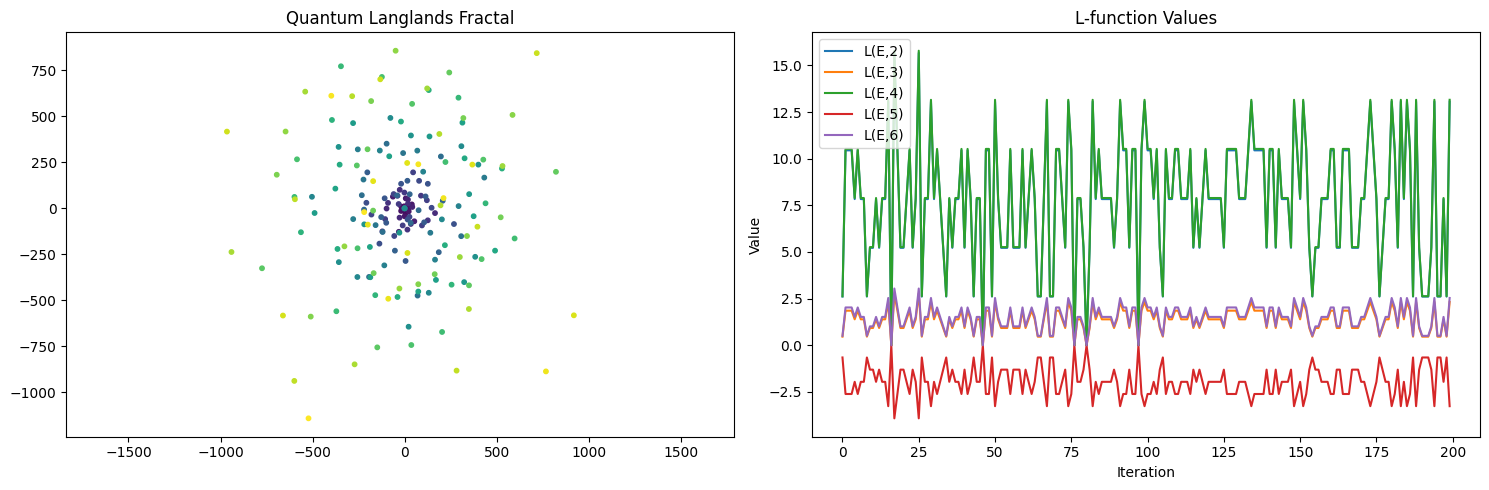


Training quantum model...
Epoch 0/500, Loss: 14.4620
Predicted L-values: [ 5.223543   0.9279733  5.2619724 -1.3045971  1.0140926]
Target L-values: [-0.22252093 -0.90096885 -0.90096885 -0.22252093  0.6234898 ]

Epoch 50/500, Loss: 5.9484
Predicted L-values: [ 3.1064126  0.5518606  3.1292665 -0.7758368  0.6030754]
Target L-values: [-0.22252093 -0.90096885 -0.90096885 -0.22252093  0.6234898 ]

Epoch 100/500, Loss: 2.2139
Predicted L-values: [ 1.5889628   0.2822826   1.6006527  -0.39684868  0.30847946]
Target L-values: [-0.22252093 -0.90096885 -0.90096885 -0.22252093  0.6234898 ]

Epoch 150/500, Loss: 1.7948
Predicted L-values: [ 1.3430492   0.23859549  1.35293    -0.33543092  0.260738  ]
Target L-values: [-0.22252093 -0.90096885 -0.90096885 -0.22252093  0.6234898 ]

Epoch 200/500, Loss: 0.4816
Predicted L-values: [ 0.11957219  0.02124225  0.12045188 -0.02986356  0.02321361]
Target L-values: [-0.22252093 -0.90096885 -0.90096885 -0.22252093  0.6234898 ]

Epoch 250/500, Loss: 0.3555
Predict

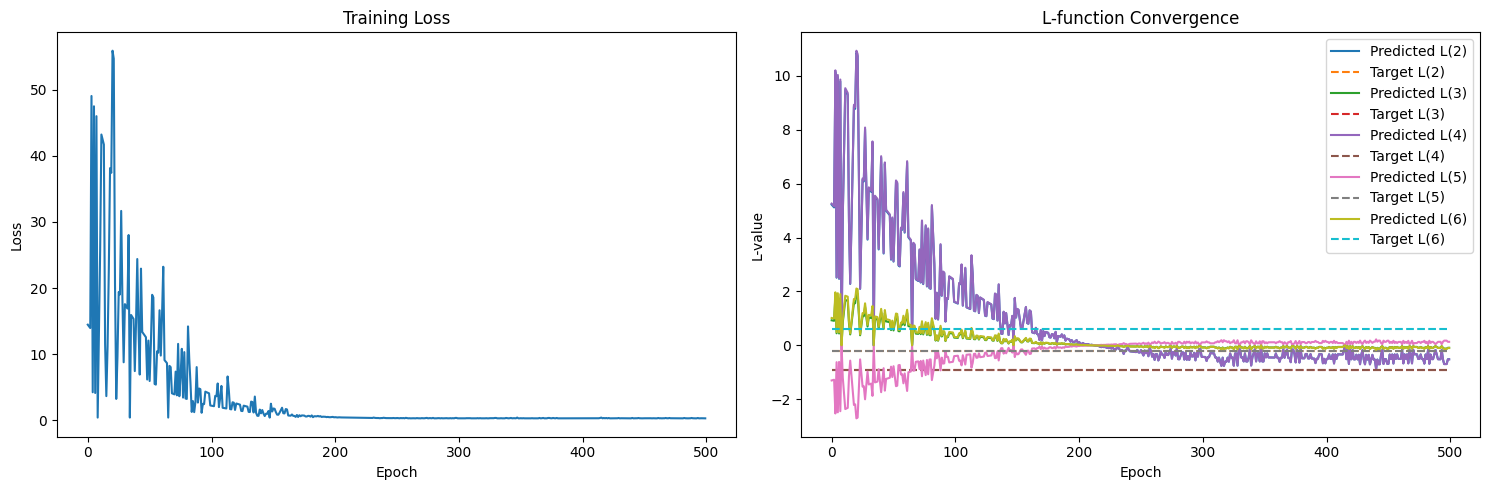

In [4]:
# Install required packages
# !pip install cirq numpy matplotlib torch sympy

import cirq
import numpy as np
import matplotlib.pyplot as plt
import torch
import sympy as sp
from collections import defaultdict
import time
from IPython.display import display, Math

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class AutomorphicForm:
    def __init__(self, weight, level):
        self.weight = weight
        self.level = level

    def fourier_expansion(self, n_terms=5):
        coefficients = [1/k for k in range(1, n_terms+1)]
        return coefficients

class GaloisRepresentation:
    def __init__(self, dimension, characteristic):
        self.dimension = dimension
        self.characteristic = characteristic

    def trace_frobenius(self, prime):
        return np.cos(2 * np.pi * prime / self.characteristic)

class QuantumLanglandsAnalyzer:
    def __init__(self, num_qubits=6):
        self.num_qubits = num_qubits
        self.qubits = cirq.LineQubit.range(num_qubits)
        self.noise_model = cirq.depolarize(p=0.01)

        # Initialize trainable parameters
        self.theta = torch.nn.Parameter(torch.randn(num_qubits, device=device))
        self.quantum_scale = torch.nn.Parameter(torch.tensor([1.0], device=device))

        # Langlands program parameters
        self.automorphic_dim = 4
        self.galois_group_order = 8
        self.field_characteristic = 7

        self.automorphic_form = AutomorphicForm(weight=2, level=1)
        self.galois_rep = GaloisRepresentation(dimension=2, characteristic=self.field_characteristic)

        self.optimizer = torch.optim.Adam([self.theta, self.quantum_scale], lr=0.01)

    def _create_langlands_circuit(self, input_data):
        circuit = cirq.Circuit()

        binary_data = format(input_data, f'0{self.num_qubits}b')
        for i, bit in enumerate(binary_data):
            if i < self.num_qubits and bit == '1':
                circuit.append(cirq.X(self.qubits[i]))

        circuit.append(cirq.qft(*self.qubits))

        for i, qubit in enumerate(self.qubits):
            circuit.append([
                cirq.ry(self.theta[i].item())(qubit),
                cirq.rz(np.pi * self.galois_rep.trace_frobenius(i+2))(qubit)
            ])

        for i in range(self.num_qubits - 1):
            circuit.append(cirq.CNOT(self.qubits[i], self.qubits[i + 1]))

        ancilla = cirq.LineQubit(self.num_qubits)
        circuit.append(cirq.H(ancilla))
        for i, qubit in enumerate(self.qubits):
            circuit.append(cirq.CZ(ancilla, qubit) ** (1 / (2 ** (i+1))))
        circuit.append(cirq.H(ancilla))

        for qubit in self.qubits + [ancilla]:
            circuit.append(cirq.measure(qubit))

        return circuit

    def encode_automorphic_form(self, data):
        data_int = int(data) if isinstance(data, (bytes, bytearray)) else data
        circuit = self._create_langlands_circuit(data_int)

        simulator = cirq.Simulator()
        result = simulator.run(circuit.with_noise(self.noise_model))

        measurements = []
        for qubit in self.qubits + [cirq.LineQubit(self.num_qubits)]:
            key = str(qubit)
            if key in result.measurements:
                measurements.append(result.measurements[key][0])
            else:
                measurements.append(0)

        return torch.tensor(measurements, device=device, dtype=torch.float32)

    def analyze_langlands_correspondence(self, quantum_state):
        quantum_state = quantum_state * self.quantum_scale
        l_values = []
        for p in range(2, 7):
            phase_factors = torch.cos(torch.tensor([2 * np.pi * p / (2**i) for i in range(1, self.num_qubits+1)],
                                                  device=device, dtype=torch.float32))
            eigenvalue = torch.sum(quantum_state[:-1] * phase_factors)
            l_values.append(eigenvalue)

        return torch.stack(l_values)

    def forward(self, data_point):
        quantum_state = self.encode_automorphic_form(data_point)
        return self.analyze_langlands_correspondence(quantum_state)

    def loss_function(self, output, target):
        return torch.mean((output - target)**2)

    def train_step(self, data_point):
        self.optimizer.zero_grad()
        output = self.forward(data_point)

        target_l_values = torch.tensor([self.galois_rep.trace_frobenius(p) for p in range(2, 7)],
                                      device=device, dtype=torch.float32)

        loss = self.loss_function(output, target_l_values)
        loss.backward()
        self.optimizer.step()

        return loss.item(), output.detach().cpu().numpy(), target_l_values.cpu().numpy()

class LanglandsFractalVisualizer:
    def __init__(self, quantum_analyzer):
        self.quantum_analyzer = quantum_analyzer
        self.points = []
        self.l_values = []

    def generate(self, iterations):
        self.points = []
        self.l_values = []
        for i in range(iterations):
            l_values = self.quantum_analyzer.forward(i)
            self.l_values.append(l_values.detach().cpu().numpy())

            x = np.cos(i) * i * np.mean(l_values.detach().cpu().numpy())
            y = np.sin(i) * i * np.std(l_values.detach().cpu().numpy())
            self.points.append((x, y))

def plot_langlands_fractal(visualizer):
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    if visualizer.points:  # Check if there are points to plot
        x_coords, y_coords = zip(*visualizer.points)
        plt.scatter(x_coords, y_coords, c=range(len(visualizer.points)), cmap='viridis', s=10)
    plt.title("Quantum Langlands Fractal")
    plt.axis('equal')

    plt.subplot(122)
    if visualizer.l_values:  # Check if there are L-values to plot
        l_values_array = np.array(visualizer.l_values)
        for i in range(l_values_array.shape[1]):
            plt.plot(l_values_array[:, i], label=f'L(E,{i+2})')
    plt.title("L-function Values")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.legend()

    plt.tight_layout()
    plt.show()

def display_mathematical_background():
    display(Math(r"\text{Quantum Langlands Program Analysis}"))
    display(Math(r"\text{1. Automorphic Forms: } L(\pi, s) = \sum_{n=1}^{\infty} \frac{a_n}{n^s}"))
    display(Math(r"\text{2. Galois Representations: } L(\rho, s) = \prod_p \frac{1}{1 - \text{tr}(\rho(\text{Frob}_p))p^{-s} + \det(\rho(\text{Frob}_p))p^{-2s}}"))
    display(Math(r"\text{3. Langlands Correspondence: } L(\pi, s) = L(\rho, s)"))

def main():
    display_mathematical_background()

    print("Initializing Enhanced Quantum Langlands Analyzer...")
    quantum_analyzer = QuantumLanglandsAnalyzer()
    fractal_visualizer = LanglandsFractalVisualizer(quantum_analyzer)

    iterations = 200
    print(f"Generating Langlands fractal visualization with {iterations} points...")
    fractal_visualizer.generate(iterations)
    plot_langlands_fractal(fractal_visualizer)

    print("\nTraining quantum model...")
    losses = []
    predicted_l_values = []
    target_l_values = []
    num_epochs = 500
    test_data = 42

    try:
        for epoch in range(num_epochs):
            loss, pred_l, target_l = quantum_analyzer.train_step(test_data)
            losses.append(loss)
            predicted_l_values.append(pred_l)
            target_l_values.append(target_l)

            if epoch % 50 == 0:
                print(f"Epoch {epoch}/{num_epochs}, Loss: {loss:.4f}")
                print(f"Predicted L-values: {pred_l}")
                print(f"Target L-values: {target_l}")
                print()

        plt.figure(figsize=(15, 5))

        plt.subplot(121)
        plt.plot(losses)
        plt.title("Training Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

        plt.subplot(122)
        predicted_l_array = np.array(predicted_l_values)
        target_l_array = np.array(target_l_values)
        for i in range(predicted_l_array.shape[1]):
            plt.plot(predicted_l_array[:, i], label=f'Predicted L({i+2})')
            plt.plot(target_l_array[:, i], '--', label=f'Target L({i+2})')
        plt.title("L-function Convergence")
        plt.xlabel("Epoch")
        plt.ylabel("L-value")
        plt.legend()

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred during training: {str(e)}")

if __name__ == "__main__":
    main()